In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [4]:
df = pd.read_csv('data/brasilDatasets.csv')

In [7]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},
    hover_data=["property_type", "state", "region"],
    color_discrete_sequence=["red"],
    zoom=3,
    height=600,
    width=600,
    
)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [8]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,152038.769409
std,47.742932,87257.712282
min,53.000000,43793.530000
25%,76.000000,88593.370000
50%,103.000000,127731.140000
75%,142.000000,193471.880000
max,252.000000,524246.390000


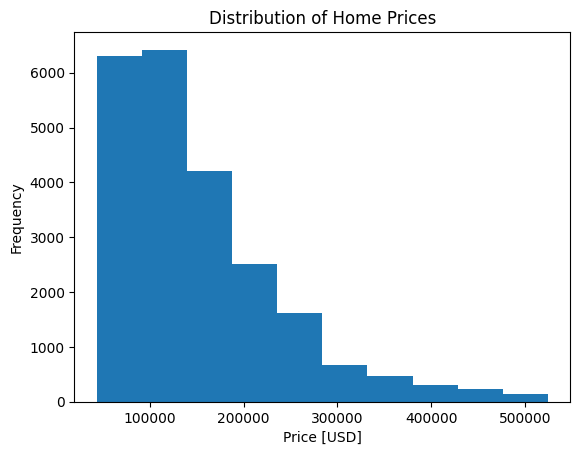

In [11]:
# Build histogram
plt.hist(df["price_usd"])


# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices"); 




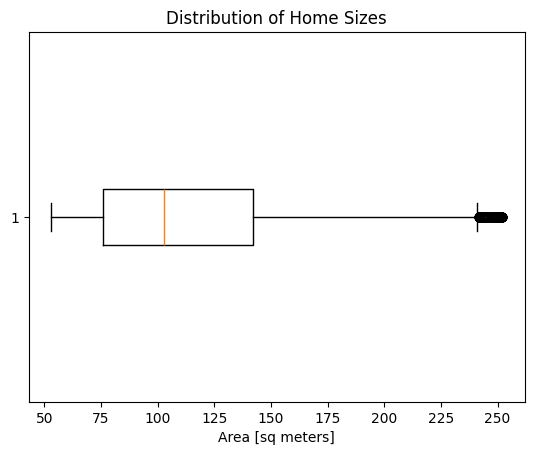

In [12]:
# Build box plot

plt.boxplot(df["area_m2"], vert=False)

# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");

In [18]:
mean_price_by_region = (
    df
    .groupby("region")
    .price_usd
    .mean()
    .sort_values(ascending=True)    
)
mean_price_by_region.head()

region
South           132486.761427
Southeast       152193.542567
Northeast       174146.781900
Central-West    178596.283663
North           180435.180194
Name: price_usd, dtype: float64

<Axes: title={'center': 'Mean Price by Region'}, xlabel='Region', ylabel='Mean Price [USD]'>

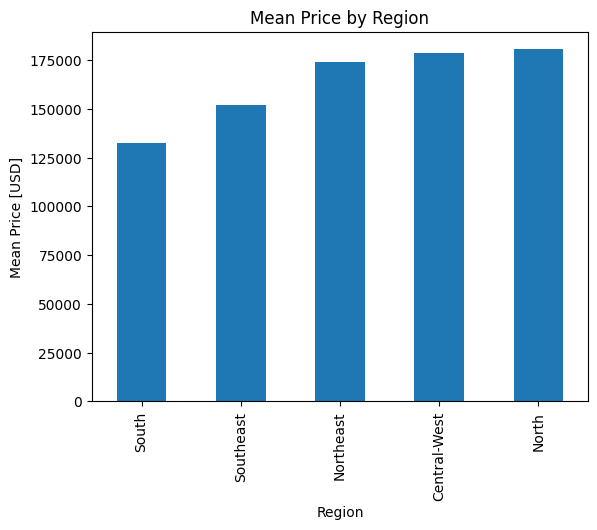

In [19]:
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Price by Region",
)

In [22]:
df_south = df[df["region"] == "South"]
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state
8370,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
8371,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
8372,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
8373,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
8374,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


In [36]:
homes_by_state = df_south['state'].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

Text(0.5, 1.0, 'Price vs. Area for Rio Grande do Sul')

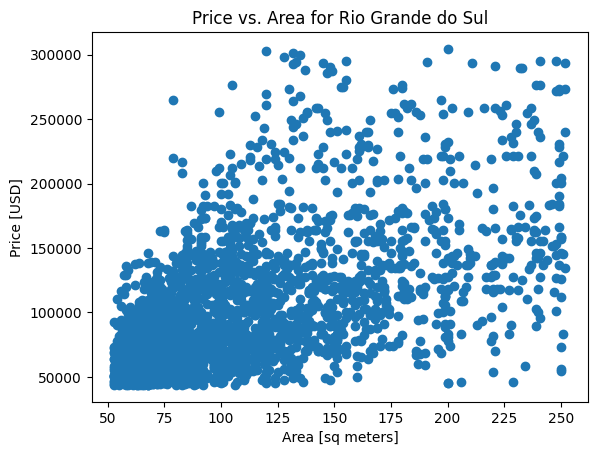

In [27]:
#plotting scatter plot for southern region

df_south_rgs = df_south[df_south['state'] == 'Rio Grande do Sul']
plt.scatter(df_south_rgs['area_m2'], df_south_rgs['price_usd'])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs. Area for Rio Grande do Sul")

In [33]:
df_south['state'].value_counts()

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

In [38]:
south_states_corr = {
    'Rio Grande do Sul': df[df['state'] == 'Rio Grande do Sul']['area_m2'].corr(
        df[df['state'] == 'Rio Grande do Sul']['price_usd']
    ),
    'Santa Catarina': df[df['state'] == 'Santa Catarina']['area_m2'].corr(
        df[df['state'] == 'Santa Catarina']['price_usd']
    ),
    'Paraná': df[df['state'] == 'Paraná']['area_m2'].corr(
        df[df['state'] == 'Paraná']['price_usd']
    )
}

# Display the correlations
print(south_states_corr)


{'Rio Grande do Sul': np.float64(0.5773267449051436), 'Santa Catarina': np.float64(0.5068121789283643), 'Paraná': np.float64(0.5436659935502658)}
